In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
plt.style.use('seaborn')
# Import library for VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [2]:
df = pd.read_csv(r"C:\Users\Suwani Gunasekara\OneDrive\Documents\Sem 7 ML\winequality-red.csv")

In [3]:
df.head()

,WineRedSerial,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,1,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,2,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,3,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,4,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,5,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


In [4]:
df.drop('WineRedSerial', inplace=True, axis=1)

In [5]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
dtype: int64

In [6]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000


The deviation in means in each variables are very high. For an example variable 'total sulfur dioxide' has a mean of 32.89 while the mean of the variable 'chlorides' has a mean value of 0.08. Therefore, we first have to normalize the data and bring them all into one scale.

In [7]:
# this is the z score as well
data= (df - df.mean()) / df.std()
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,-0.528194,0.961576,-1.391037,-0.453077,-0.243630,-0.466047,-0.379014,0.558100,1.288240,-0.579025,-0.959946
1,-0.298454,1.966827,-1.391037,0.043403,0.223805,0.872365,0.624168,0.028252,-0.719708,0.128910,-0.584594
2,-0.298454,1.296660,-1.185699,-0.169374,0.096323,-0.083643,0.228975,0.134222,-0.331073,-0.048074,-0.584594
3,1.654339,-1.384011,1.483689,-0.453077,-0.264878,0.107558,0.411372,0.664069,-0.978798,-0.461036,-0.584594
4,-0.528194,0.961576,-1.391037,-0.453077,-0.243630,-0.466047,-0.379014,0.558100,1.288240,-0.579025,-0.959946


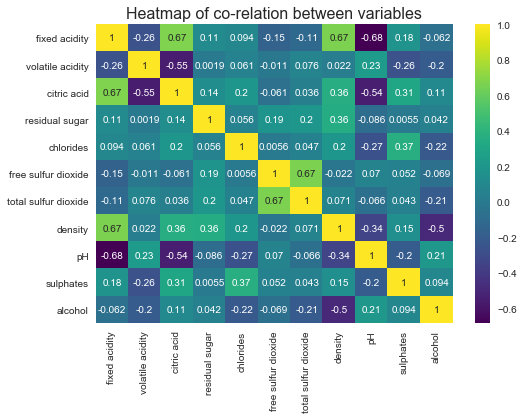

In [8]:
sns.heatmap(data.corr(),annot=True,cmap='viridis')
plt.title('Heatmap of co-relation between variables',fontsize=16)
plt.show()

As seen from the above plot, all the correlation values are less than 0.7. Therefore, there is no multicolinearity present in the dataset.

Now we check whether there is any outliers present in the dataset. In order to do that boxplots were drawn for each variable.

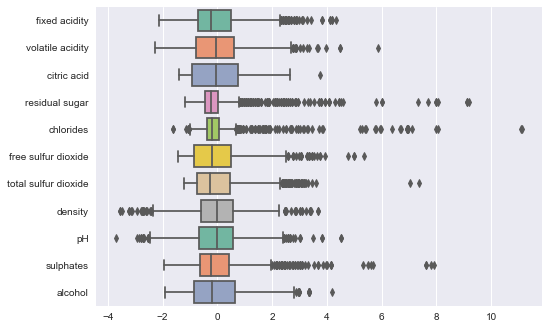

In [9]:
ax = sns.boxplot(data=data, orient="h", palette="Set2")

From the above plots can say that there are outliers present in this dataset. In order to answer the question of whether to remove these outliers or not, have to find the effect of removing them as if the outliers were blindly removed, it might effect the model adversly. Therefore, two regression model was run, one with outliers present and one without outliers. 

### Model with outliers

In [10]:
# make a copy of the dataset
data_o= data.copy(deep = True)

In [11]:
data_o.shape

(1599, 11)

In [37]:
alpha = 0.01
iters = 100000

In [38]:
def computeCost(X, y, theta):
    inner = np.power(((X * theta.T) - y), 2)
    return np.sum(inner) / (2 * len(X))

def gradientDescent(X, y, theta, alpha, iters):
    temp = np.matrix(np.zeros(theta.shape))
    parameters = int(theta.ravel().shape[1])
    cost = np.zeros(iters)
    
    for i in range(iters):
        error = (X * theta.T) - y
        
        for j in range(parameters):
            term = np.multiply(error, X[:,j])
            temp[0,j] = theta[0,j] - ((alpha / len(X)) * np.sum(term))
            
        theta = temp
        cost[i] = computeCost(X, y, theta)
        
    return theta, cost

In [40]:
# make a copy of the dataset
data_ = data_o
# add ones column
#data_.insert(0, 'Ones', 1)

# set X (training data) and y (target variable)
cols = data_.shape[1]
X = data_.iloc[:,0:cols-1]
y = data_.iloc[:,cols-1:cols]

# convert to matrices and initialize theta
X = np.matrix(X.values)
y = np.matrix(y.values)
#number of zeros to be entered in the theta matrix
zerosNum = 11
theta = np.matrix(np.zeros(zerosNum))

# perform linear regression on the data set
g, cost = gradientDescent(X, y, theta, alpha, iters)

# get the cost (error) of the model
computeCost(X, y, g)

0.16485020067182934

Text(0.5, 1.0, 'Error vs. Training Epoch')

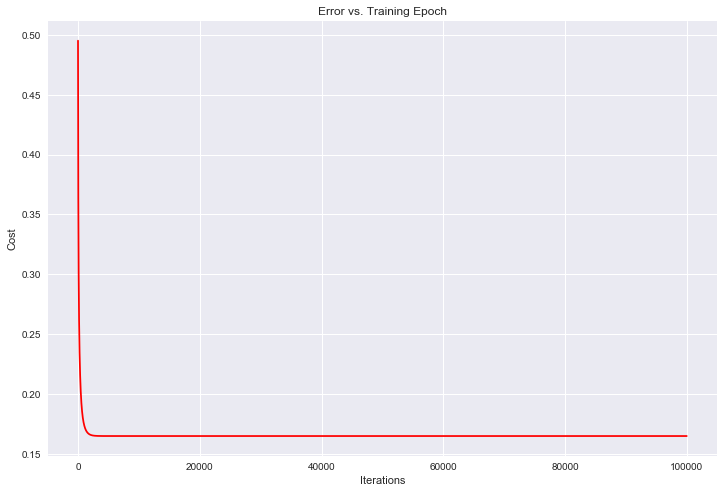

In [41]:
fig, ax = plt.subplots(figsize=(12,8))
ax.plot(np.arange(iters), cost, 'r')
ax.set_xlabel('Iterations')
ax.set_ylabel('Cost')
ax.set_title('Error vs. Training Epoch')

In [42]:
y_pred = X*g.T

##### MSE

In [43]:
MSE = np.square(np.subtract(y,y_pred)).mean()
print(MSE)

0.3297004013436587


##### RMSE

In [44]:
RMSE = MSE ** (0.5)
print(RMSE)

0.5741954382818264


##### R squared

In [19]:
SS_Residual = np.square(np.subtract(y, y_pred)).sum()
SS_Total = np.square(np.subtract(y,np.mean(y))).sum()
r2 = 1 - (float(SS_Residual))/SS_Total
print(r2)

0.6700932778815776


### Model without outliers 

In [20]:
df_ = data[(data <3).all(axis=1)]

In [21]:
df_.shape

(1463, 11)

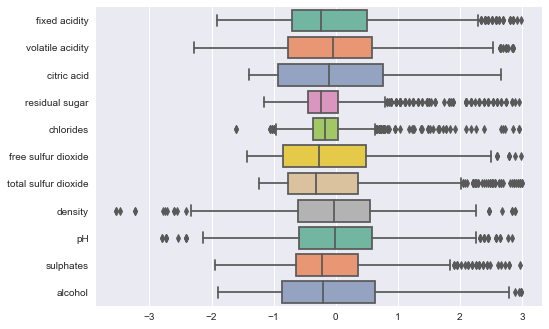

In [22]:
ax = sns.boxplot(data=df_, orient="h", palette="Set2")

In [23]:
df_.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,-0.528194,0.961576,-1.391037,-0.453077,-0.243630,-0.466047,-0.379014,0.558100,1.288240,-0.579025,-0.959946
1,-0.298454,1.966827,-1.391037,0.043403,0.223805,0.872365,0.624168,0.028252,-0.719708,0.128910,-0.584594
2,-0.298454,1.296660,-1.185699,-0.169374,0.096323,-0.083643,0.228975,0.134222,-0.331073,-0.048074,-0.584594
3,1.654339,-1.384011,1.483689,-0.453077,-0.264878,0.107558,0.411372,0.664069,-0.978798,-0.461036,-0.584594
4,-0.528194,0.961576,-1.391037,-0.453077,-0.243630,-0.466047,-0.379014,0.558100,1.288240,-0.579025,-0.959946


In [24]:
# add ones column
df_.insert(0, 'Ones', 1)

# set X (training data) and y (target variable)
cols = df_.shape[1]
X_wo = df_.iloc[:,0:cols-1]
y_wo = df_.iloc[:,cols-1:cols]

# convert to matrices and initialize theta
X_wo = np.matrix(X_wo.values)
y_wo = np.matrix(y_wo.values)
#number of zeros to be entered in the theta matrix
zerosNum = 11
theta = np.matrix(np.zeros(zerosNum))

# perform linear regression on the data set
g_wo, cost_wo = gradientDescent(X_wo, y_wo, theta, alpha, iters)

# get the cost (error) of the model
computeCost(X_wo, y_wo, g_wo)

0.14275275830305573

Text(0.5, 1.0, 'Error vs. Training Epoch')

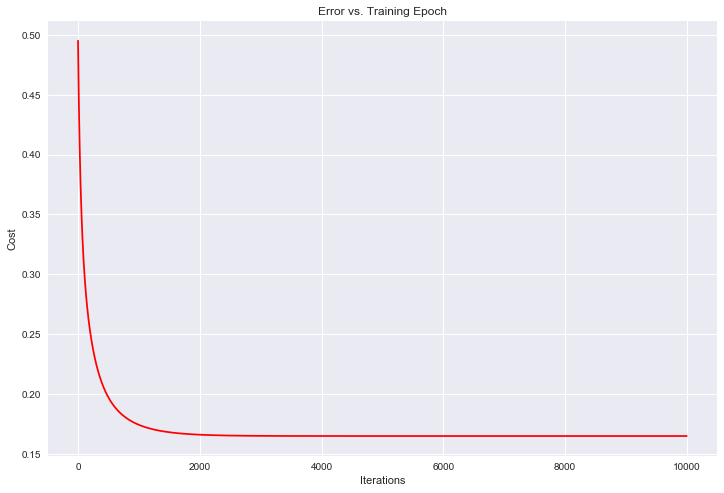

In [25]:
fig, ax = plt.subplots(figsize=(12,8))
ax.plot(np.arange(iters), cost, 'r')
ax.set_xlabel('Iterations')
ax.set_ylabel('Cost')
ax.set_title('Error vs. Training Epoch')

In [26]:
predicted_wo = X_wo*g_wo.T

##### MSE

In [27]:
MSE = np.square(np.subtract(y_wo,predicted_wo)).mean()
print(MSE)

0.28550551660611145


##### RMSE

In [28]:
RMSE = MSE ** (0.5)
print(RMSE)

0.5343271625194731


##### R squared

In [29]:
SS_Residual = np.square(np.subtract(y_wo, predicted_wo)).sum()
SS_Total = np.square(np.subtract(y_wo,np.mean(y_wo))).sum()
r2 = 1 - (float(SS_Residual))/SS_Total
print(r2)

0.6928806966938297


For the model with outliers
MSE:0.3484
RMSE:0.5902
R squared:0.6513

For the model without outliers
MSE:0.3088
RMSE:0.5557
R squared:0.6677

From the above analysis we can conlude that the model without the outliers perform better. Therefore, the chosen model is the model without the outliers.

#### Finding the optimal learning rate

In [30]:
alphaList = []
costList = []
def findalpha(alpha):
    a = alpha
    for i in range(0,100):
        g_wo2, cost_wo2 = gradientDescent(X_wo, y_wo, theta, a, iters)
        #computeCost(X2, y2, g2)
        alphaList.append(a)
        costList.append(computeCost(X_wo, y_wo, g_wo2))
        a += 0.01

In [32]:
#findalpha(0.01)

C:\Anaconda3\lib\site-packages\numpy\core\_methods.py:38: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)
C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in power
  


In [33]:
alphadf = pd.DataFrame({'Alpha':alphaList,'Cost':costList})

In [34]:
alphadf.sort_values('Cost').head()

,Alpha,Cost
34,0.35,0.142753
20,0.21,0.142753
22,0.23,0.142753
23,0.24,0.142753
24,0.25,0.142753


In [31]:
alphaNew = 0.35

In [32]:
# set X (training data) and y (target variable)
cols = df_.shape[1]
X_wo = df_.iloc[:,0:cols-1]
y_wo = df_.iloc[:,cols-1:cols]

# convert to matrices and initialize theta
X_wo = np.matrix(X_wo.values)
y_wo = np.matrix(y_wo.values)
#number of zeros to be entered in the theta matrix
zerosNum = 11
theta = np.matrix(np.zeros(zerosNum))

# perform linear regression on the data set
g_wo2, cost_wo2 = gradientDescent(X_wo, y_wo, theta, alphaNew, iters)

# get the cost (error) of the model
computeCost(X_wo, y_wo, g_wo2)

0.14275275716067812

In [33]:
predicted_alphanew = X_wo*g_wo2.T

In [34]:
MSE = np.square(np.subtract(y_wo,predicted_alphanew)).mean()
print(MSE)

0.28550551432135624


In [35]:
RMSE = MSE ** (0.5)
print(RMSE)

0.5343271603814991


In [36]:
SS_Residual = np.square(np.subtract(y_wo, predicted_alphanew)).sum()
SS_Total = np.square(np.subtract(y_wo,np.mean(y_wo))).sum()
r2 = 1 - (float(SS_Residual))/SS_Total
print(r2)

0.692880699151549


The new alpha rate gives a better R squared compared to alpha = 0.01. Furthermore, the MSE and RMSE is lower in the new model. Therefore, this model is better than the model with alpha = 0.01.

### (1) Chosen multivariate model

The chosen multivariate model is the model without outliers and with a learning rate of 0.35

In [41]:
g_wo2

matrix([[ 0.04926733,  0.84801759,  0.0508986 ,  0.1346531 ,  0.59686475,
          0.0280608 ,  0.01588711, -0.09926411, -1.1240492 ,  0.50826962,
          0.21588515]])

$ Y = 0.04926733 + 0.84801759*fixedAcidity + 0.0508986*volatileAcidity + 0.1346531*citricAcid + 0.59686475*residualSugar + 0.0280608*chlorides + 0.01588711*freeSulfurDioxide - 0.09926411*totalSulfurDioxide - 1.1240492*density + 0.50826962*pH + 0.21588515*sulphates  $

### (2) The MSE, RMSE and R squared values of the chosen model

- MSE: 0.2855055143213561
- RMSE: 0.534327160381499
- R squared:0.6928806991515492

### (3) Define the 3 most important factors that affect the alcohol percentage as per your analysis for the above implementation.

In [272]:
g_wo2

matrix([[ 0.04926733,  0.84801759,  0.0508986 ,  0.1346531 ,  0.59686475,
          0.0280608 ,  0.01588711, -0.09926411, -1.1240492 ,  0.50826962,
          0.21588515]])

In [274]:
df_.columns

Index(['Ones', 'fixed acidity', 'volatile acidity', 'citric acid',
       'residual sugar', 'chlorides', 'free sulfur dioxide',
       'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol'],
      dtype='object')

The three most important factors based based on the high coeffecients (from most important to least).
 1. density     
 2. fixed acidity 
 3. residual sugar